In [1]:
import numpy as np
from NeuralNetwork import NeuralNetwork
from Layers import Dense, Reshape, Conv, sigmoid
from Tensor import Tensor
import matplotlib.pyplot as plt
import pickle
from IPython.display import clear_output
mnist = pickle.load(open('mnist.pkl','rb'))


batchSize = 100
x_train = Tensor((mnist['training_images'].reshape(-1,batchSize,28,28)/255))
y_train = Tensor(np.array([[0]*i+[1]+[0]*(9-i) for i in mnist['training_labels']]).reshape((-1,batchSize,10)))

model = NeuralNetwork([Conv((5,5),6,2,(2,2),sigmoid,inputShape=(28,28,1)),
                        Conv((5,5),10,0,(1,1),sigmoid),
                        Conv((5,5),16,0,(1,1),sigmoid),
                        Reshape(-1), 
                        Dense(100,sigmoid),
                        Dense(10,sigmoid)])

def plotfunc(model):
    global loss
    loss = model.loss
    if len(loss) % 10000 == 0:
        model.save(f'backups/mnist{len(loss)}')
    if len(loss) % 100 == 0 :

        plt.plot(loss[100:])
        plt.pause(0.1)
        clear_output(wait=True)
 
print(model)
#from tests import *
#dw,db,plotter = gradientTest(model)
model.train(x_train, y_train, epochs=1000, lrate=0.01, plotfunc=plotfunc)

		 MODEL SUMMARY: 
Input: 		 (28, 28, 1)
Conv Layer: 		(14, 14, 6)
Conv Layer: 		(10, 10, 10)
Conv Layer: 		(6, 6, 16)
Reshape Layer: 		(576,)
Dense Layer: 		(100,)
Dense Layer: 		(10,)



KeyboardInterrupt: 

In [ ]:
def plotfunc(model):
    global loss
    loss = model.loss
    if len(loss) % 1000 == 0:
        model.save(f'backups/mnist{len(loss)}')
    if len(loss) % 100 == 0 :
        plt.plot(loss[1000:])
        plt.pause(0.1)
        clear_output(wait=True)

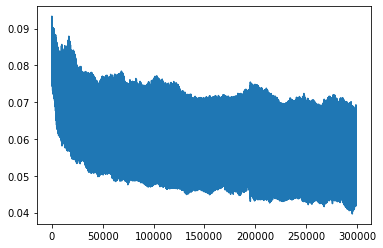

In [60]:
plotfunc(model)

In [57]:
import numpy as np
from NeuralNetwork import NeuralNetwork
from Layers import Dense, Reshape, Conv, sigmoid
from Tensor import Tensor
import matplotlib.pyplot as plt
import pickle
from IPython.display import clear_output
mnist = pickle.load(open('mnist.pkl','rb'))


batchSize = 200
x_train = Tensor((mnist['training_images'].reshape(-1,200,28,28)/255))
y_train = Tensor(np.array([[0]*i+[1]+[0]*(9-i) for i in mnist['training_labels']]).reshape((-1,batchSize,10)))

model = NeuralNetwork([Conv((6,6),3,0,(2,2),sigmoid,inputShape=(28,28,1)),
                        Conv((5,5),6,0,(1,1),sigmoid),
                        Conv((3,3),9,0,(1,1),sigmoid),
                        Reshape(-1), 
                        Dense(10,sigmoid)])

def plotfunc(model):
    global loss
    loss = model.loss
    if len(loss) % 1000 == 0:
        model.save(f'backups/mnist{len(loss)}')
    if len(loss) % 100 == 0 :
        plt.plot(loss[100:])
        plt.pause(0.1)
        clear_output(wait=True)

model = NeuralNetwork.load('mnist167100')
model.allocateMemory(200)
model.train(x_train, y_train, epochs=1000, lrate=0.1, plotfunc=plotfunc)

KeyboardInterrupt: 

In [ ]:
model.gradientDescent(x_train[0],y_train[0],lrate=0.1)

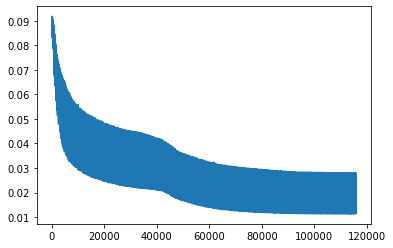

In [53]:
plt.plot(model.loss[1000:])
def plotfunc(model):
    global loss
    loss = model.loss
    if len(loss) % 100 == 0 :
        model.save(f'backups/mnist{len(loss)}')
        plt.plot(loss[100000:])
        plt.pause(0.1)
        clear_output(wait=True)

In [45]:
model.train(x_train, y_train, epochs=1000, lrate=0.1, plotfunc=plotfunc)

KeyboardInterrupt: 

In [59]:
model = NeuralNetwork.load('mnist')
model.allocateMemory(200)
import pickle
import matplotlib.pyplot as plt
mnist = pickle.load(open('mnist.pkl','rb'))
import pandas as pd

batchSize = 200
x_test = Tensor((mnist['test_images'].reshape(-1,200,28,28)/255))
y_test = mnist['test_labels'].reshape(-1,200,1)
prediction = []
correct = []
for i in range(x_test.shape[0]):
    output = model.predict(x_test[i]).get()
    prediction += list(model.predict(x_test[i]).get())
    correct += list(model.predict(x_test[i]).get().argmax(axis=1) == y_test[i].reshape(batchSize))

incorrectImages = mnist['test_images'][np.logical_not(correct)]
incorrectprediction = np.array(prediction)[np.logical_not(correct)]
plt.imshow(incorrectImages[0].reshape(28,28))

(10000, 10)

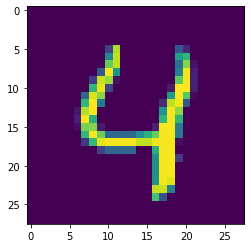

In [60]:
import pandas as pd

batchSize = 200
x_test = Tensor((mnist['test_images'].reshape(-1,200,28,28)/255))
y_test = mnist['test_labels'].reshape(-1,200,1)
prediction = []
correct = []
for i in range(x_test.shape[0]):
    output = model.predict(x_test[i]).get()
    prediction += list(model.predict(x_test[i]).get())
    correct += list(model.predict(x_test[i]).get().argmax(axis=1) == y_test[i].reshape(batchSize))

incorrectImages = mnist['test_images'][np.logical_not(correct)]
incorrectprediction = np.array(prediction)[np.logical_not(correct)]
plt.imshow(incorrectImages[0].reshape(28,28))

In [87]:
np.array(incorrectprediction).sum(axis=1).shape

(1423,)

In [93]:
np.array(incorrectprediction).sum(axis=1).argmax()

378

<BarContainer object of 10 artists>

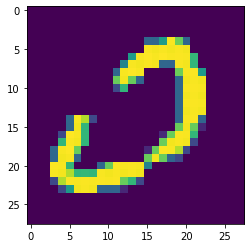

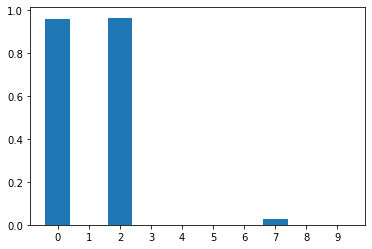

In [94]:
i = 378
plt.imshow(incorrectImages[i].reshape(28,28))
plt.figure()
plt.bar([str(i) for i in range(10)],incorrectprediction[i],)

In [48]:
incorrectImages = mnist['test_images']
incorrectImages

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [40]:
list(model.predict(x_test[i]).get().argmax(axis=1) == y_test[i].reshape(batchSize))

[True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Fal

In [36]:
np.array([model.predict(x_test[i]).get().argmax(axis=1),y_test[i].reshape(200)])

array([[8, 3, 5, 2, 0, 8, 8, 3, 3, 1, 2, 3, 5, 9, 6, 3, 2, 6, 1, 3, 6, 0,
        7, 2, 1, 7, 1, 5, 2, 8, 2, 1, 7, 9, 6, 1, 1, 2, 9, 8, 1, 7, 7, 5,
        7, 0, 7, 3, 1, 3, 1, 0, 7, 7, 0, 3, 5, 5, 2, 7, 6, 6, 9, 2, 8, 3,
        5, 2, 2, 5, 6, 0, 8, 2, 9, 2, 8, 8, 8, 8, 7, 9, 9, 3, 0, 6, 6, 3,
        2, 1, 3, 2, 2, 9, 8, 0, 0, 5, 7, 8, 3, 5, 7, 6, 0, 2, 9, 1, 1, 7,
        5, 7, 3, 9, 8, 8, 9, 7, 1, 2, 1, 2, 2, 3, 2, 3, 2, 3, 9, 1, 7, 1,
        0, 3, 5, 5, 8, 6, 5, 7, 6, 7, 6, 6, 3, 2, 7, 9, 1, 1, 3, 5, 6, 1,
        9, 5, 1, 5, 3, 9, 7, 8, 9, 1, 1, 0, 9, 1, 1, 5, 5, 9, 0, 6, 2, 3,
        3, 1, 5, 1, 2, 0, 3, 8, 1, 2, 6, 7, 1, 6, 2, 3, 9, 0, 1, 2, 2, 0,
        8, 9],
       [8, 3, 4, 4, 0, 8, 8, 3, 3, 1, 7, 3, 5, 9, 6, 3, 2, 6, 1, 3, 6, 0,
        7, 2, 1, 7, 1, 4, 2, 4, 2, 1, 7, 9, 6, 1, 1, 2, 4, 8, 1, 7, 7, 4,
        8, 0, 7, 3, 1, 3, 1, 0, 7, 7, 0, 3, 5, 5, 2, 7, 6, 6, 9, 2, 8, 3,
        5, 2, 2, 5, 6, 0, 8, 2, 9, 2, 8, 8, 8, 8, 7, 4, 9, 3, 0, 6, 6, 3,
        2, 1, 3, 2, 2, 

0.855

In [18]:
model.predict(x_test[i]).get().argmax(axis=1)

array([7, 2, 1, 0, 6, 1, 5, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 5, 1, 9, 6,
       6, 5, 9, 0, 7, 9, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 9, 2,
       3, 5, 1, 2, 9, 9, 6, 3, 5, 5, 6, 0, 9, 1, 9, 5, 7, 8, 9, 3, 7, 9,
       6, 1, 3, 0, 7, 0, 2, 7, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 5, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 9, 1, 1, 6, 9, 6, 0, 5, 6, 9, 9, 2, 1, 9, 1,
       8, 7, 3, 9, 7, 9, 1, 6, 9, 2, 5, 9, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 9, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 6, 1, 6, 5, 9, 6, 5, 6, 5, 1, 5, 9, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6,
       9, 2])

In [2]:
model.save('mnist')

In [3]:
model2 = NeuralNetwork.load("mnist")

[2, 2, 2, 2, 2]


In [9]:
def plotfunc(model):
    global loss
    loss = model.loss
    if len(loss)%1000 == 0:
        model.save(f'backups/mnist{len(loss)}')
    if len(loss) % 100 == 0 :
        plt.plot(loss[1000:])
        plt.pause(0.1)
        clear_output(wait=True)
model.train(x_train, y_train, epochs=300, lrate=0.01, plotfunc=plotfunc)

KeyboardInterrupt: 

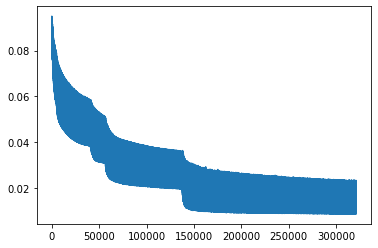

In [15]:
model.train(x_train, y_train, epochs=1000, lrate=0.05, plotfunc=plotfunc)

NameError: name 'plotfunc' is not defined

In [16]:

import numpy as np
from NeuralNetwork import NeuralNetwork
from Layers import Dense, Reshape, Conv, sigmoid
from Tensor import Tensor
import matplotlib.pyplot as plt
import pickle
from IPython.display import clear_output
mnist = pickle.load(open('mnist.pkl','rb'))


NeuralNetwork.load("mnist")

FileNotFoundError: [Errno 2] No such file or directory: 'models/mnist.pkl'

In [7]:
! models

/bin/bash: models/: is a directory


In [ ]:
model.train(x_train, y_train, epochs=50, lrate=0.05, plotfunc=plotfunc)

In [33]:
mnist['test_labels']

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [31]:
mnist.keys()

dict_keys(['training_images', 'test_images', 'training_labels', 'test_labels'])

In [ ]:
plt.imshow(mnist['test_images'][1].reshape(28,28))

In [45]:
pred = []
for ind in range(mnist['test_images'].shape[0]):
    model.allocateMemory(1)
    out = model.predict(Tensor(mnist['test_images'][ind].reshape(28,28)))
    prediccion = out.get().argmax()
    pred.append(prediccion == mnist['test_labels'][ind])

np.mean(pred)

KeyboardInterrupt: 